<a href="https://colab.research.google.com/github/SrijaniDas-GitHub/Regression_problems/blob/master/Estimate_Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source of this dataset

https://www.kaggle.com/mirichoi0218/insurance

# About the data

This dataset was inspired by the book Machine Learning with R by Brett Lantz. The data contains medical information and costs billed by health insurance companies. It contains 1338 rows of data and the following columns: age, gender, BMI, children, smoker, region, insurance charges.


# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [15]:
med_insurance_df = pd.read_csv("/content/insurance.csv")

In [16]:
med_insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
med_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

In [5]:
med_insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
med_insurance_df.groupby('region').max()['charges']

region
northeast    58571.07448
northwest    60021.39897
southeast    63770.42801
southwest    52590.82939
Name: charges, dtype: float64

In [11]:
med_insurance_df.groupby('region').mean()['charges']

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [13]:
pd.get_dummies(med_insurance_df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


- We will have 2 columns northeast and southeast.
- For northwest and southwest, avg charges are in the same range.

# Encoding Categorical Data

In [17]:
med_insurance_df['northeast_region'] = pd.get_dummies(med_insurance_df['region'])['northeast']
med_insurance_df['southeast_region'] = pd.get_dummies(med_insurance_df['region'])['southeast']
med_insurance_df['male'] = pd.get_dummies(med_insurance_df['sex'])['male']
med_insurance_df['smoker'] = pd.get_dummies(med_insurance_df['smoker'])['yes']
med_insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges,northeast_region,southeast_region,male
0,19,female,27.90,0,1,southwest,16884.9240,0,0,0
1,18,male,33.77,1,0,southeast,1725.5523,0,1,1


In [20]:
# It is obvious that females have lower BMI than male, the output supports the fact

print("Maximun ",med_insurance_df.groupby('male').max()['bmi'])
print("Mean ",med_insurance_df.groupby('male').mean()['bmi'])

Maximun  male
0    48.07
1    53.13
Name: bmi, dtype: float64
Mean  male
0    30.377749
1    30.943129
Name: bmi, dtype: float64


In [21]:
print("Maximun ",med_insurance_df.groupby('smoker').max()['bmi'])
print("Mean ",med_insurance_df.groupby('smoker').mean()['bmi'])

Maximun  smoker
0    53.13
1    52.58
Name: bmi, dtype: float64
Mean  smoker
0    30.651795
1    30.708449
Name: bmi, dtype: float64


In [22]:
print("Maximun ",med_insurance_df.groupby('male').max()['charges'])
print("Mean ",med_insurance_df.groupby('male').mean()['charges'])

Maximun  male
0    63770.42801
1    62592.87309
Name: charges, dtype: float64
Mean  male
0    12569.578844
1    13956.751178
Name: charges, dtype: float64


In [23]:
# Smokers have more medical charges than non-smokers

print("Maximun ",med_insurance_df.groupby('smoker').max()['charges'])
print("Mean ",med_insurance_df.groupby('smoker').mean()['charges'])

Maximun  smoker
0    36910.60803
1    63770.42801
Name: charges, dtype: float64
Mean  smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64


# Visualizing Data

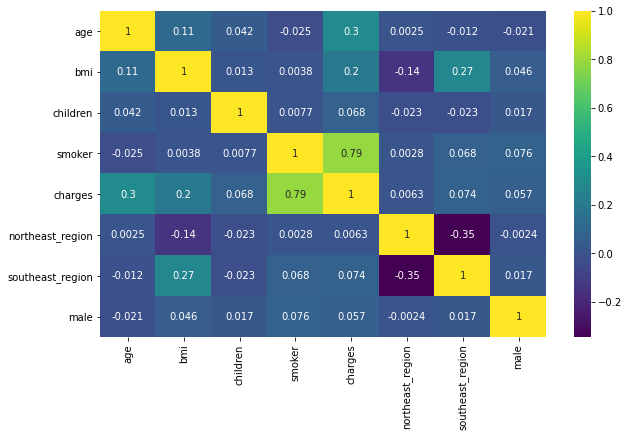

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(med_insurance_df.corr(), annot=True, cmap='viridis')

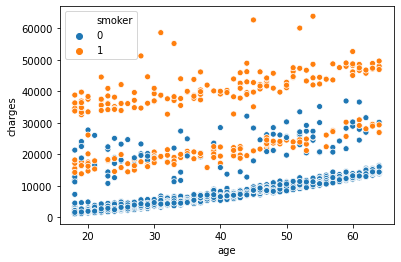

In [24]:
sns.scatterplot(x='age', y='charges', data=med_insurance_df, hue='smoker')

Observation : Smokers having  more medical charges 

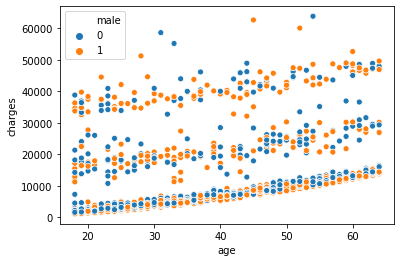

In [25]:
sns.scatterplot(x='age', y='charges', data=med_insurance_df, hue='male')

**Observation :** male and female have almost same medical charges

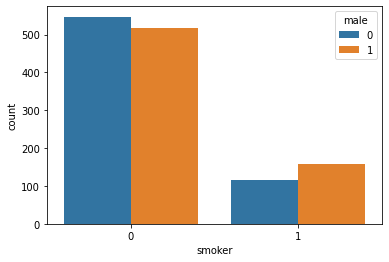

In [26]:
sns.countplot(x='smoker', data=med_insurance_df, hue='male')

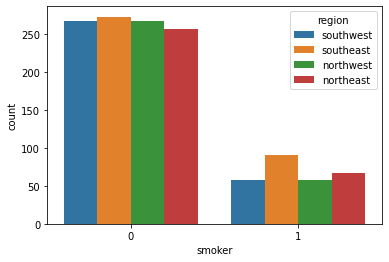

In [27]:
sns.countplot(x='smoker', data=med_insurance_df, hue='region')

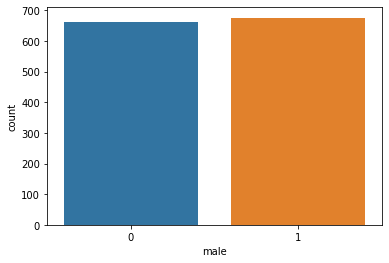

In [28]:
sns.countplot(x='male', data=med_insurance_df)

**Observation** : Its a balanced dataset

# Drop Unnecessary Features 

In [19]:
med_insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'northeast_region', 'southeast_region', 'male'],
      dtype='object')

- We will drop the columns "male" and "children" for having little correlation with medical charges.
- We will drop column "sex" as it is already encoded.


In [29]:
for col in ['sex', 'children', 'region', 'male']:
  if col in med_insurance_df.columns:
    med_insurance_df.drop(col, axis=1, inplace=True)

# Splitting the data for training and testing

In [30]:
X = med_insurance_df.drop('charges', axis=1)
y = med_insurance_df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

# Model evaluating

In [32]:
print(lm.intercept_)

-12253.77038167677


In [33]:
df = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
df

,Coefficient
age,242.624353
bmi,363.750013
smoker,23483.797516
northeast_region,281.220119
southeast_region,-290.320331


Text(0.5, 1.0, 'True value vs. Predicted')

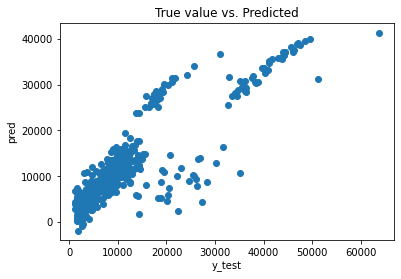

In [34]:
plt.scatter(y_test, pred)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.title("True value vs. Predicted")

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4028.290281530895
MSE: 33705554.96430828
RMSE: 5805.648539509456
